### 초기설정

In [9]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [10]:
import pandas as pd

df_2018 = pd.read_excel('/content/2018.xlsx')
df_2019 = pd.read_excel('/content/2019.xlsx')
df_2020 = pd.read_excel('/content/2020.xlsx')
df_2021 = pd.read_excel('/content/2021.xlsx')
df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [11]:
grade_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통이다': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [12]:
df_2018['국가명'] = df_2018['COUNTRY']

In [13]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2022~2024

In [14]:
# 1. 활동명 매핑
q4a_mapping_2022 = {
    "Q4A01": "식도락 관광", "Q4A02": "쇼핑", "Q4A03": "자연경관 감상", "Q4A04": "고궁/역사 유적지 방문",
    "Q4A05": "전통문화체험", "Q4A06": "박물관, 전시관 관람", "Q4A07": "K-POP/한류스타 공연장 방문",
    "Q4A08": "드라마/영화 촬영지 방문", "Q4A09": "연극, 뮤지컬, 발레 등 공연 관람", "Q4A10": "지역 축제 참여",
    "Q4A11": "유흥/오락", "Q4A12": "뷰티/의료관광", "Q4A13": "스포츠/레포츠 및 비즈니스 활동",
    "Q4A14": "업무수행", "Q4A15": "연수/교육/연구", "Q4A16": "시찰(산업시설 등)", "Q4A17": "기타"
}

q4b_code_mapping_2022 = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관, 전시관 관람", 7: "K-POP/한류스타 공연장 방문",
    8: "드라마/영화 촬영지 방문", 9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥/오락", 12: "뷰티/의료관광", 13: "스포츠/레포츠 및 비즈니스 활동",
    14: "업무수행", 15: "연수/교육/연구", 16: "시찰(산업시설 등)", 17: "기타"
}

q4a_cols = list(q4a_mapping_2022.keys())
q4b_cols = ["Q4B1", "Q4B2", "Q4B3"]

# 2. 주요활동 추출 함수
def get_q4a_activities(row):
    return [q4a_mapping_2022[col] for col in q4a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q4b_satisfaction(row):
    return [q4b_code_mapping_2022.get(int(row[col]), f"코드 {row[col]}")
            for col in q4b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2022가 정의된 상태에서만)
df_2022["주요활동"] = df_2022.apply(get_q4a_activities, axis=1)
df_2022["만족활동"] = df_2022.apply(get_q4b_satisfaction, axis=1)


In [15]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [16]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


# 분석에 필요한 변수 추출 및 "만족한 활동" 이진화

| 변수명                          | 설명            | 비고                              |
| ---------------------------- | ------------- | ------------------------------- |
| `Q8_1a1`, `Q8_1a2`, `Q8_1a3` | 만족한 활동 1\~3순위 | 다중응답 → 활동명 기준으로 20개 항목을 0/1 인코딩 |
| `Q11`                        | 전반 만족도        | Likert 1\~5                     |
| `Q13`                        | 재방문 의향        | Likert 1\~5                     |
| `Q14`                        | 추천 의향         | Likert 1\~5                     |
| `M일HAP`                      | 체류일 수         | 수치형                             |
| `총액1인TOT2`                   | 총 1인 지출액      | 수치형                             |


## Q8_1a1~a3 → 활동명 기준 wide-format 이진 변환

In [18]:
import pandas as pd

# 사용할 변수만 추출
selected_columns = ['Q8_1a1', 'Q8_1a2', 'Q8_1a3', 'Q11', 'Q13', 'Q14', 'M일HAP', '총액1인TOT2']
df_selected = df_2024[selected_columns].copy()

# 만족 활동 코드 → 활동명 매핑
activity_map = {
    1: '식도락', 2: '쇼핑', 3: '자연경관', 4: '휴양', 5: '고궁유적',
    6: '전통문화', 7: '박물관', 8: 'K-POP', 9: '공연관람', 10: '지역축제',
    11: '유흥', 12: '오락', 13: '뷰티미용', 14: '치료검진', 15: '스포츠관람',
    16: '스포츠참가', 17: '국제회의', 18: '비즈니스', 19: '연수교육', 20: '기타'
}

# wide-format 이진 변수 생성 (20개)
for code, name in activity_map.items():
    df_selected[name] = ((df_selected['Q8_1a1'] == code) |
                         (df_selected['Q8_1a2'] == code) |
                         (df_selected['Q8_1a3'] == code)).astype(int)

# 원본 Q8_1a1~3 삭제
df_selected.drop(columns=['Q8_1a1', 'Q8_1a2', 'Q8_1a3'], inplace=True)

# '국가명' 컬럼도 함께 보존
df_selected['국가명'] = df_2024['국가명']

# 결과 확인
df_selected.head()



,Q11,Q13,Q14,M일HAP,총액1인TOT2,식도락,쇼핑,자연경관,휴양,고궁유적,...,오락,뷰티미용,치료검진,스포츠관람,스포츠참가,국제회의,비즈니스,연수교육,기타,국가명
0,5,5,5,6,2710.000,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,프랑스
1,5,5,5,5,1364.675,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,홍콩
2,4,4,4,6,1065.900,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,홍콩
3,5,5,5,6,922.680,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,일본
4,4,5,5,5,1647.300,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,홍콩


- 결측값 확인 (없음)

In [19]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16216 entries, 0 to 16215
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q11       16216 non-null  int64  
 1   Q13       16216 non-null  int64  
 2   Q14       16216 non-null  int64  
 3   M일HAP     16216 non-null  int64  
 4   총액1인TOT2  16216 non-null  float64
 5   식도락       16216 non-null  int64  
 6   쇼핑        16216 non-null  int64  
 7   자연경관      16216 non-null  int64  
 8   휴양        16216 non-null  int64  
 9   고궁유적      16216 non-null  int64  
 10  전통문화      16216 non-null  int64  
 11  박물관       16216 non-null  int64  
 12  K-POP     16216 non-null  int64  
 13  공연관람      16216 non-null  int64  
 14  지역축제      16216 non-null  int64  
 15  유흥        16216 non-null  int64  
 16  오락        16216 non-null  int64  
 17  뷰티미용      16216 non-null  int64  
 18  치료검진      16216 non-null  int64  
 19  스포츠관람     16216 non-null  int64  
 20  스포츠참가     16216 non-null  in

## StandardScaler로 정규화

- 국가명은 drop 했다가 다시 추가해서 국가별 클러스터 빈도 확인

In [20]:
from sklearn.preprocessing import StandardScaler

# 클러스터링에 사용할 수치형 변수만 추출
features = df_selected.drop(columns=['국가명'])

# StandardScaler 적용
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 결과를 DataFrame으로 다시 구성
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# 국가명은 보존하여 함께 결합
df_scaled['국가명'] = df_selected['국가명'].values

# 확인
df_scaled.head()

,Q11,Q13,Q14,M일HAP,총액1인TOT2,식도락,쇼핑,자연경관,휴양,고궁유적,...,오락,뷰티미용,치료검진,스포츠관람,스포츠참가,국제회의,비즈니스,연수교육,기타,국가명
0,0.722097,0.682222,0.662417,-0.262841,0.378663,-1.166365,0.876350,1.295934,-0.308237,-0.685885,...,-0.314433,-0.287246,-0.202209,-0.125387,-0.14052,-0.147655,-0.364088,-0.169908,-0.091281,프랑스
1,0.722097,0.682222,0.662417,-0.338247,-0.435248,0.857364,0.876350,-0.771644,-0.308237,1.457969,...,-0.314433,-0.287246,-0.202209,-0.125387,-0.14052,-0.147655,-0.364088,-0.169908,-0.091281,홍콩
2,-1.023248,-0.754894,-1.121928,-0.262841,-0.616004,0.857364,0.876350,-0.771644,-0.308237,-0.685885,...,3.180324,-0.287246,-0.202209,-0.125387,-0.14052,-0.147655,-0.364088,-0.169908,-0.091281,홍콩
3,0.722097,0.682222,0.662417,-0.262841,-0.702651,0.857364,-1.141096,1.295934,-0.308237,-0.685885,...,-0.314433,-0.287246,-0.202209,-0.125387,-0.14052,-0.147655,-0.364088,-0.169908,-0.091281,일본
4,-1.023248,0.682222,0.662417,-0.338247,-0.264262,-1.166365,0.876350,-0.771644,-0.308237,1.457969,...,3.180324,-0.287246,-0.202209,-0.125387,-0.14052,-0.147655,-0.364088,-0.169908,-0.091281,홍콩


## PCA 적용 (주성분 분석)

- 25개의 수치형 변수 → 주성분 2~3개로 축소

- Scree Plot으로 설명력 확인 (누적 기여율)




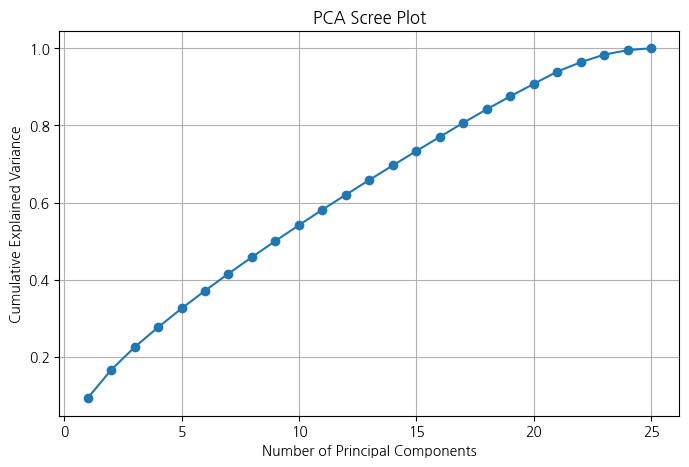

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 국가명 제외하고 PCA 적용
X = df_scaled.drop(columns=['국가명'])

# PCA 전체 수행
pca = PCA()
X_pca = pca.fit_transform(X)

# 설명된 분산 비율 (기여율)
explained_var_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_var_ratio)

# Scree Plot (기여율 그래프)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()

- 기여도 확인

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# PCA만 재실행 (df_scaled에는 국가명이 포함되어 있음)
X = df_scaled.drop(columns=['국가명'])

pca = PCA()
X_pca = pca.fit_transform(X)

# 기여율 및 누적 기여율 계산
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 데이터프레임 구성
pca_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance Ratio': cumulative_variance
})

# 상위 10개만 보기
pca_df.round(4).head(10)


,PC,Explained Variance Ratio,Cumulative Variance Ratio
0,PC1,0.0928,0.0928
1,PC2,0.0730,0.1658
2,PC3,0.0592,0.2251
3,PC4,0.0514,0.2765
4,PC5,0.0489,0.3254
5,PC6,0.0459,0.3713
6,PC7,0.0446,0.4159
7,PC8,0.0427,0.4585
8,PC9,0.0420,0.5006
9,PC10,0.0408,0.5414


In [23]:
pca_df.round(4)

,PC,Explained Variance Ratio,Cumulative Variance Ratio
0,PC1,0.0928,0.0928
1,PC2,0.0730,0.1658
2,PC3,0.0592,0.2251
3,PC4,0.0514,0.2765
4,PC5,0.0489,0.3254
5,PC6,0.0459,0.3713
6,PC7,0.0446,0.4159
7,PC8,0.0427,0.4585
8,PC9,0.0420,0.5006
9,PC10,0.0408,0.5414


지금 이 데이터에서는 PC8까지(약 46%)로 자르는 게 실무적으로도 가장 타당한 선택

너무 적으면 정보 부족

너무 많으면 해석·시각화·클러스터링 모두 어려워짐

실무에서는 **“모델이 성능을 내면서도 해석 가능한 수준”**이면 충분히 실용적

사회적 데이터이므로 8개로 데이터 특성상 설명력이 조금 낮아도 괜찮다고 조사함.

## 최적 K 찾기 (Elbow Method + Silhouette Score)


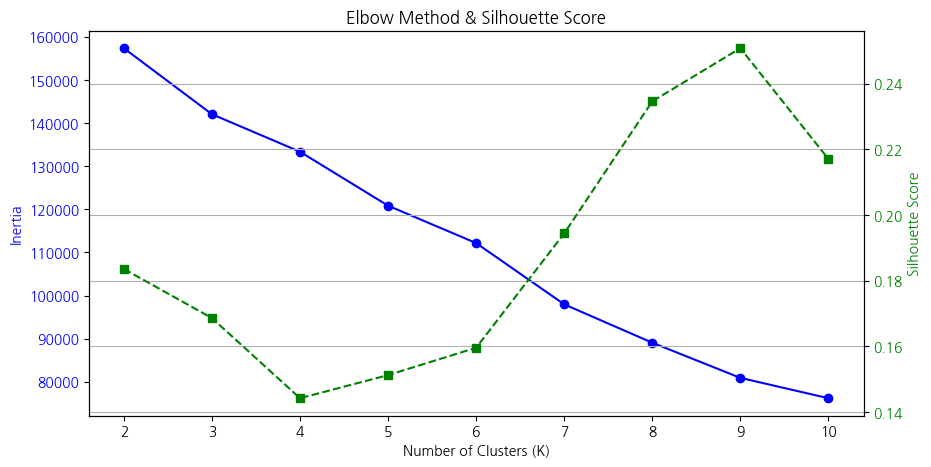

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# PCA 결과 중 상위 8개 주성분 사용
X_pca_8 = X_pca[:, :8]

# K 값 범위 설정
k_range = range(2, 11)
inertia_list = []
silhouette_list = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_8)
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X_pca_8, kmeans.labels_))

# Elbow + Silhouette Score 시각화
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(k_range, inertia_list, 'o-', color='blue', label='Inertia (Elbow)')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Silhouette 점수 추가 축
ax2 = ax1.twinx()
ax2.plot(k_range, silhouette_list, 's--', color='green', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Elbow Method & Silhouette Score')
plt.grid(True)
plt.show()

## KMeans 클러스터링 (K=8 적용)

해석 가능한 군집 수

Silhouette도 충분히 높음

엘보우 포인트 근처

In [25]:
from sklearn.cluster import KMeans

# K=8로 클러스터링
kmeans = KMeans(n_clusters=8, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca_8)

# 원본 데이터에 군집 결과 추가
df_scaled['cluster'] = cluster_labels

# 클러스터별 개수 확인
df_scaled['cluster'].value_counts().sort_index()

,count
cluster,
0,2869
1,5179
2,1460
3,1081
4,968
5,3324
6,534
7,801


## 군집별 평균 비교

In [26]:
# 클러스터별 변수 평균값 비교 (Q11, Q13, Q14, M일HAP, 총액1인TOT2, 활동들)
grouped_means = df_scaled.groupby('cluster').mean(numeric_only=True)

# 활동 변수 이름 정리
activity_cols = list(activity_map.values())
cols_to_show = ['Q11', 'Q13', 'Q14', 'M일HAP', '총액1인TOT2'] + activity_cols

# 결과 출력
grouped_means[cols_to_show].round(2)

,Q11,Q13,Q14,M일HAP,총액1인TOT2,식도락,쇼핑,자연경관,휴양,고궁유적,...,유흥,오락,뷰티미용,치료검진,스포츠관람,스포츠참가,국제회의,비즈니스,연수교육,기타
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.41,0.13,0.39,-0.02,0.14,-0.74,-0.69,-0.07,-0.02,0.91,...,0.13,0.37,-0.15,-0.19,-0.13,-0.14,-0.15,-0.36,-0.17,-0.07
1,0.47,0.60,0.59,-0.18,-0.25,0.44,0.40,0.19,0.14,-0.13,...,-0.01,-0.08,-0.24,-0.20,-0.13,-0.14,-0.15,-0.36,-0.17,0.10
2,0.17,0.34,0.25,-0.16,0.40,-0.01,0.47,-0.59,-0.04,-0.44,...,-0.10,-0.16,2.05,1.87,-0.13,-0.14,-0.15,-0.33,-0.17,-0.07
3,-1.15,-1.09,-1.32,-0.27,-0.11,-0.33,-0.53,-0.38,-0.29,-0.55,...,-0.18,-0.29,-0.28,-0.19,-0.13,-0.14,0.65,2.44,-0.08,-0.06
4,0.43,0.53,0.56,-0.21,0.33,-0.40,-0.48,-0.50,-0.22,-0.39,...,-0.17,-0.25,-0.25,-0.20,-0.13,-0.14,1.40,2.29,0.11,-0.06
5,-0.95,-1.02,-1.15,-0.23,-0.28,0.34,0.18,0.33,-0.01,-0.00,...,0.07,0.01,-0.17,-0.18,-0.13,-0.14,-0.15,-0.36,-0.17,-0.03
6,0.09,-0.12,0.05,0.27,0.23,-0.37,-0.41,-0.16,-0.10,-0.26,...,-0.03,0.03,-0.20,-0.05,3.67,4.10,-0.12,-0.28,-0.11,-0.03
7,0.07,0.17,0.16,2.95,1.15,-0.41,-0.16,-0.09,0.03,-0.22,...,-0.05,0.10,-0.17,-0.11,-0.12,-0.12,-0.11,-0.11,2.76,0.02


## 군집별 특성 히트맵 시각화


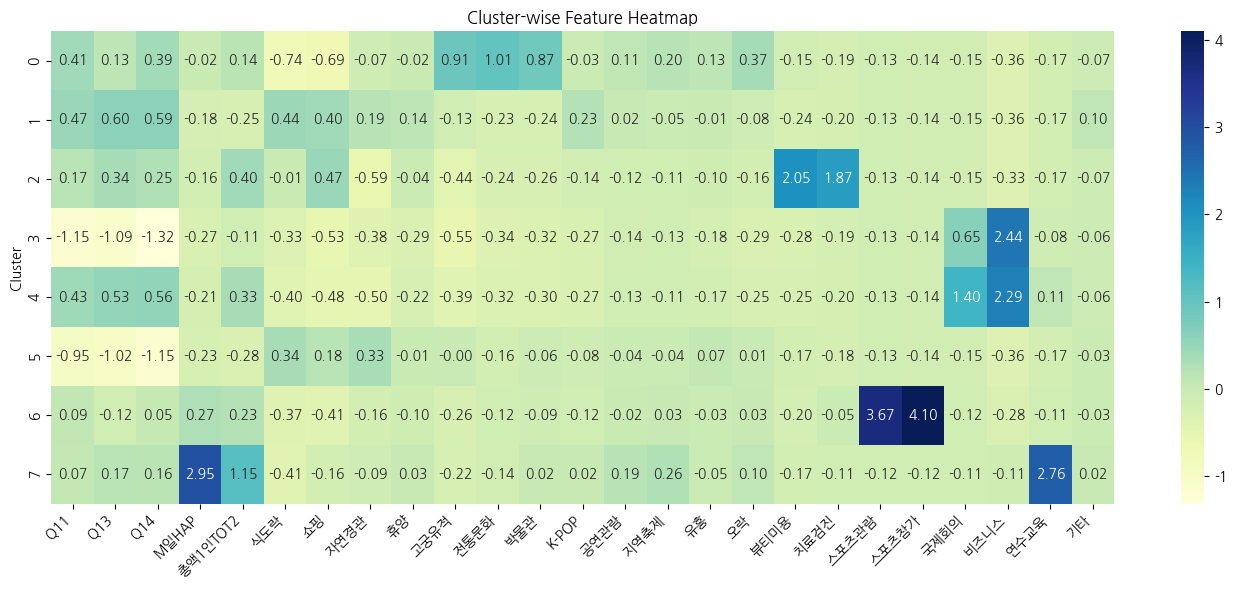

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 군집별 평균값 계산
grouped_means = df_scaled.groupby('cluster').mean(numeric_only=True)

# 분석할 주요 변수만 선택
cols_to_plot = ['Q11', 'Q13', 'Q14', 'M일HAP', '총액1인TOT2'] + list(activity_map.values())
data_for_heatmap = grouped_means[cols_to_plot]

# 히트맵 시각화
plt.figure(figsize=(14, 6))
sns.heatmap(data_for_heatmap, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Cluster-wise Feature Heatmap")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> 제 Z-score로 표준화한 후 다시 히트맵 그리기

왜?

| 구분 | 이전 히트맵 (평균값 기반)  | Z-score 히트맵                      |
| -- | ---------------- | -------------------------------- |
| 기준 | 절대값 평균           | **전체 평균 대비 상대적 차이**              |
| 해석 | 수치가 크면 많다 정도     | **다른 군집 대비 특이한 정도**를 정량적으로 해석 가능 |
| 예시 | “K-POP 평균이 0.91” | “K-POP이 평균보다 2.05 표준편차 높음”       |


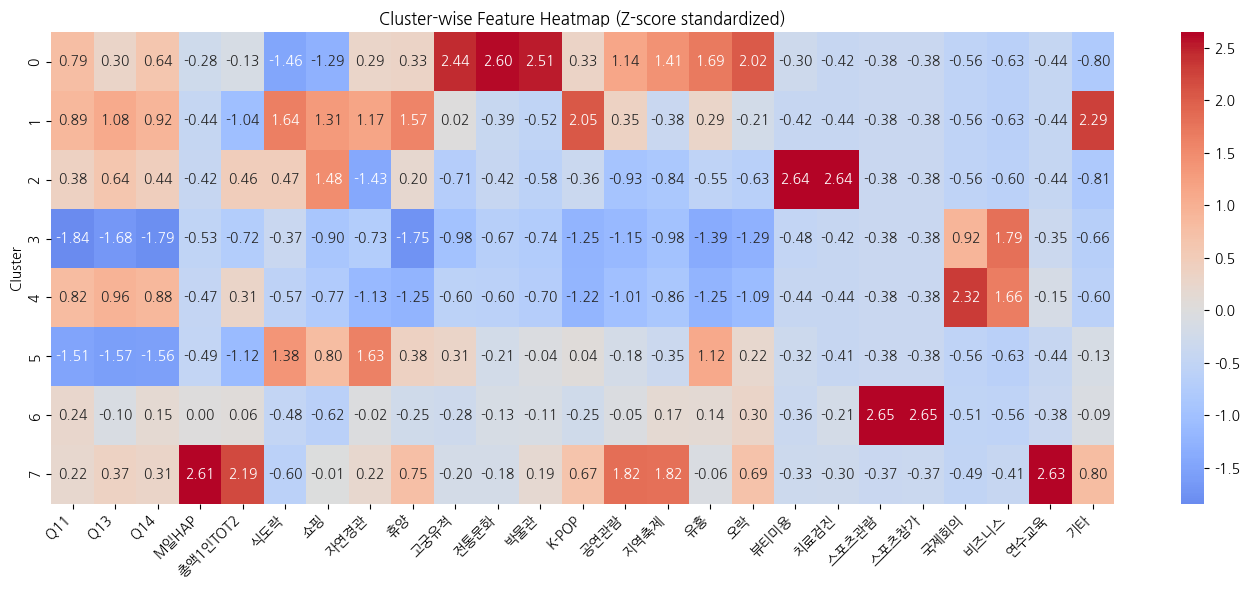

In [30]:
from sklearn.preprocessing import StandardScaler

# 군집별 평균값 계산
grouped_means = df_scaled.groupby('cluster').mean(numeric_only=True)

# 주요 변수만 선택
cols_to_plot = ['Q11', 'Q13', 'Q14', 'M일HAP', '총액1인TOT2'] + list(activity_map.values())
data_for_heatmap = grouped_means[cols_to_plot]

# Z-score로 표준화
scaler = StandardScaler()
data_z = pd.DataFrame(scaler.fit_transform(data_for_heatmap),
                      columns=data_for_heatmap.columns,
                      index=data_for_heatmap.index)

# 히트맵 시각화 (Z-score 기준)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(data_z, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Cluster-wise Feature Heatmap (Z-score standardized)")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

| Cluster | 주요 특징 (Z-score 기준, ±2.0 이상 강조)                                |
| ------- | ------------------------------------------------------------- |
| **0**   | **K-POP(2.44)**, 공연관람(2.60), 스포츠관람(2.51) → **한류 + 엔터 중심**     |
| **1**   | Q11\~Q14 모두 높음, 식도락(1.64), 쇼핑(1.31), 자연경관(1.17) → **종합적 만족형** |
| **2**   | K-POP(2.64), 공연관람(2.64) 집중 → **한류 초집중형 마니아**                  |
| **3**   | Q11\~Q14 **매우 낮음** (-1.8 이상), 전체적으로 낮음 → **불만족·이탈 가능성**       |
| **4**   | 스포츠관람(2.32), 스포츠참가(1.66) → **레저·액티비티형**                       |
| **5**   | 식도락(1.38), 쇼핑(1.63), 만족도는 낮음 → **쇼핑+가성비형**                    |
| **6**   | 치료검진(2.65), 스포츠참가(2.65) → **의료 + 액티비티 특화형**                   |
| **7**   | 체류일(2.61), 지출(2.19), 연수교육(2.63) → **장기체류 + 학술/교육형**           |


추가 인사이트

- Cluster 0과 2의 차이점:

    둘 다 K-POP·공연관람은 높지만

    - Cluster 0은 스포츠도 포함 → 종합 엔터형

    - Cluster 2는 오로지 한류 → 핵심 타겟 K-콘텐츠형

- Cluster 3은 정책적으로 관리가 필요한 집단:

    - 모든 변수에서 부정적 Z-score

    - 이탈 방지, 피드백 분석 타겟

- Cluster 6, 7은 틈새시장 전략군:

    - 6은 헬스/치료 기반 체류형 관광

    - 7은 유학생, 교환연수 중심의 장기 체류층



## 군집별 국가명 분포 보기

> 국가별 비율 테이블

In [28]:
# 군집별 국가 분포 (비율)
country_dist = df_scaled.groupby('cluster')['국가명'].value_counts(normalize=True).unstack().fillna(0) * 100

# 상위 국가만 TOP10
top_countries = country_dist.loc[:, country_dist.sum().sort_values(ascending=False).head(10).index]

top_countries.round(1)

국가명,일본,중국,싱가포르,홍콩,독일,말레이시아,대만,기타,캐나다,미국
cluster,,,,,,,,,,
0,3.7,3.3,12.6,5.0,4.6,3.7,2.3,8.0,4.4,4.8
1,15.8,15.3,5.5,9.9,2.2,5.6,6.1,2.4,4.2,4.2
2,16.9,26.0,4.7,4.9,5.8,2.3,5.0,1.1,2.5,3.1
3,4.6,17.5,10.3,2.8,8.0,3.8,2.5,5.1,5.4,5.9
4,9.6,5.6,13.3,3.1,7.5,3.2,2.9,4.5,3.8,3.1
5,20.3,14.2,3.7,12.9,2.5,5.1,8.2,2.2,5.5,2.3
6,9.4,2.6,9.7,11.8,3.2,3.6,7.9,6.4,3.6,3.4
7,21.8,1.4,7.4,2.4,6.6,9.5,1.1,4.4,1.6,3.5


> 국가 분포 히트맵 시각화

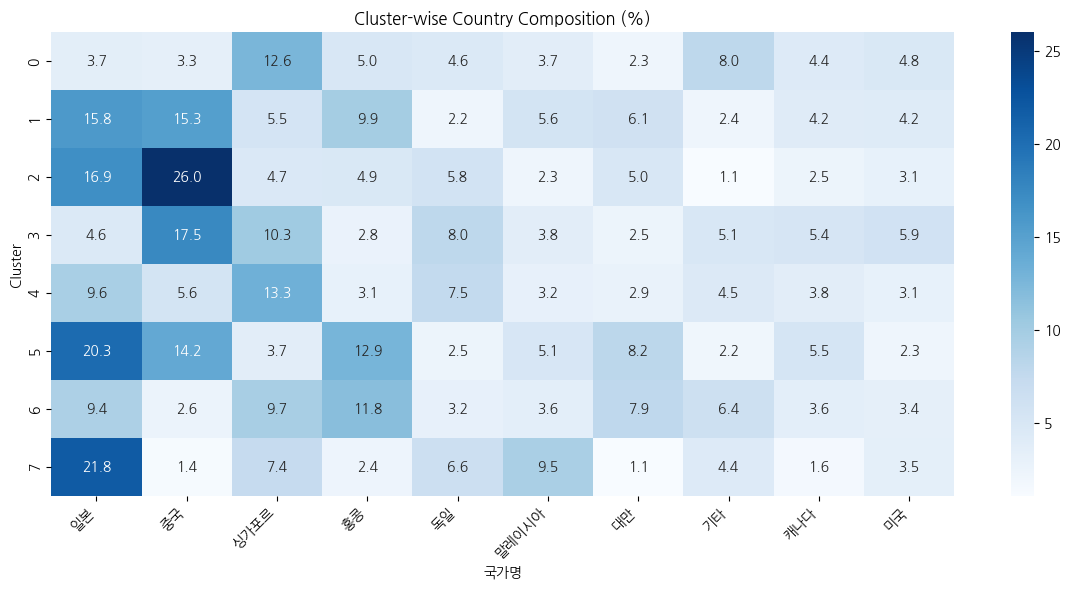

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(top_countries, annot=True, fmt=".1f", cmap="Blues")
plt.title("Cluster-wise Country Composition (%)")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

| 클러스터              | 주요 국가 구성 (TOP3) | 핵심 특성 (Z-score 기준)         | 마케팅/정책 인사이트                  |
| ----------------- | --------------- | -------------------------- | ---------------------------- |
| **0** 한류·스포츠형     | 싱가포르, 기타, 홍콩    | K-POP↑, 공연관람↑, 스포츠관람↑      | 동남아 신흥시장 대상 한류 + 스포츠 콘텐츠 패키지 |
| **1** 종합만족형       | 일본, 중국, 홍콩      | Q11\~Q14 전반 만족↑, 식도락·쇼핑↑   | 주요 전통시장 대상 재방문 유도형 마케팅       |
| **2** K-콘텐츠 마니아형  | 중국, 일본, 싱가포르    | K-POP↑↑, 공연관람↑↑ (Z>2.6)    | 한류 팬 대상 콘서트·굿즈·촬영지 연계 상품     |
| **3** 불만족층 (리스크군) | 중국, 독일, 캐나다     | Q11\~Q14 모두 매우 낮음 (Z<-1.8) | 불만족 원인 분석, 민원 피드백 우선 대응      |
| **4** 액티비티 중심형    | 싱가포르, 일본, 독일    | 스포츠관람↑, 스포츠참가↑             | 액티비티·레저 연계 체험 중심 관광 확대       |
| **5** 쇼핑/가성비형     | 일본, 중국, 홍콩      | 식도락↑, 쇼핑↑, Q11\~Q14는 낮음    | 면세점 혜택 + 가격 중심 홍보 콘텐츠        |
| **6** 의료·헬스형      | 홍콩, 대만, 말레이시아   | 치료검진↑↑, 스포츠참가↑↑            | 헬스케어 + 액티비티 연계 상품 기획 타겟      |
| **7** 장기체류/연수형    | 일본, 말레이시아, 싱가포르 | 체류일↑, 지출↑, 연수교육↑↑          | 교육/비즈니스 프로그램 중심 콘텐츠 개발       |


- 일본·중국은 다양한 클러스터에 등장 → 세분화된 타겟 전략 필요

- 싱가포르는 0, 4, 7번 모두에 등장 → 짧은 체류형 + 장기 체류형 둘 다

- Cluster 3은 다국적 불만족층 → 공통 문제점 개선 우선순위

- Cluster 6, 7은 틈새 고부가가치 → 정책적 지원 대상

> 전체 국가

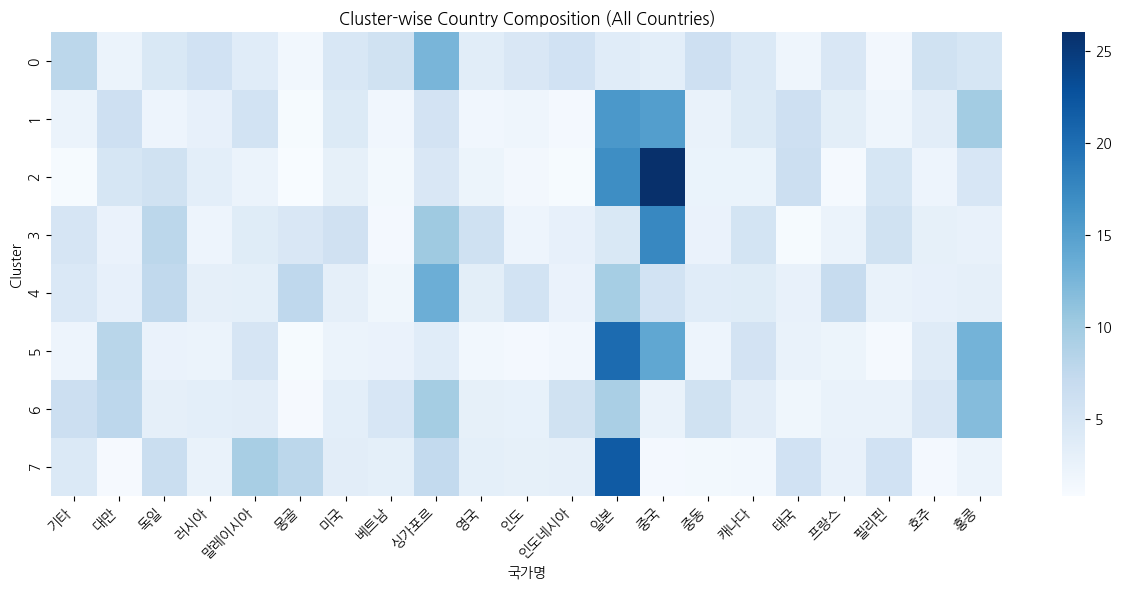

In [31]:
# 전체 국가를 포함한 군집별 비율 테이블
country_dist = df_scaled.groupby('cluster')['국가명'].value_counts(normalize=True).unstack().fillna(0) * 100

# 전체 히트맵 보기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(max(12, len(country_dist.columns) * 0.6), 6))
sns.heatmap(country_dist, annot=False, cmap="Blues")
plt.title("Cluster-wise Country Composition (All Countries)")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> 클러스터별 지출

In [32]:
# 군집별 총액1인TOT2 평균값 순서대로 정렬
df_scaled.groupby('cluster')['총액1인TOT2'].mean().sort_values(ascending=False).round(2)

,총액1인TOT2
cluster,
7,1.15
2,0.40
4,0.33
6,0.23
0,0.14
3,-0.11
1,-0.25
5,-0.28


| 순위    | 클러스터  | Z-score (지출 기준) | 해석                                  |
| ----- | ----- | --------------- | ----------------------------------- |
| 🥇 1위 | **7** | **+1.15**       | ▶ **가장 많이 쓰는 군집** (장기체류/연수형)        |
| 🥈 2위 | **2** | +0.40           | ▶ K-POP 마니아층 → 공연·쇼핑 지출 높음          |
| 🥉 3위 | **4** | +0.33           | ▶ 스포츠·레저형 → 체험/레저 지출                |
| 4위    | 6     | +0.23           | ▶ 의료·액티비티형 → 헬스/스포츠 서비스 지출          |
| 5위    | 0     | +0.14           | ▶ K-POP + 스포츠형 → K-콘텐츠 관람층          |
| 6위    | 3     | -0.11           | ▶ 불만족층 → 활동·소비 모두 낮음                |
| 7위    | 1     | -0.25           | ▶ 만족도 높지만 소비는 적음 (가성비형?)            |
| 8위    | 5     | **-0.28**       | ▶ 쇼핑/식도락형이지만 지출 적음 → **가성비 단기층** 추정 |


# 클러스터별 타겟 분석

| 클러스터            | 관광목적성    | 지출     | 재방문의향  | 집단크기        | 정책 타겟 적합도           | 평가 요약      |
| --------------- | -------- | ------ | ------ | ----------- | ------------------- | ---------- |
| **0** 한류+스포츠    | 높음       | 보통↑    | 보통↑    | 중간 (2869)   | ✔️ 매우 높음            | ✅ 주력 타겟 가능 |
| **1** 종합만족형     | 높음       | 낮음↓    | 매우 높음↑ | 매우 큼 (5179) | ✔️ 높음               | ✅ 핵심 유지군   |
| **2** K-POP 마니아 | 매우 높음↑   | 높음↑    | 높음↑    | 적음 (1460)   | ✔️ 타겟 마케팅 적합        | ✅ 세컨드 타겟   |
| **3** 불만족층      | 낮음       | 낮음↓    | 낮음↓    | 적음          | ❌ 개입 어려움            | ❌ 제외       |
| **4** 스포츠/레저형   | 중간↑      | 높음↑    | 중간     | 작음 (968)    | ⚠️ 틈새시장             | 조건부 타겟     |
| **5** 쇼핑/가성비형   | 중간       | 낮음↓    | 중간     | 큼 (3324)    | ⚠️ 유입은 되지만 소비 유도 필요 | 부차적 개선 타겟  |
| **6** 의료/헬스형    | 낮음       | 보통↑    | 낮음     | 작음 (534)    | ❌ 제한적               | ❌ 전략 한정    |
| **7** 장기체류형     | 낮음 (비관광) | 매우 높음↑ | 중간     | 소수 (801)    | ⚠️ 마케팅 불가, 체류자 관리용  | ❌ 직접 타겟 아님 |
